Task conditions in data variable: ['REST_nogsr', 'REST_gsr']
Dictionary keys within each task condition: ['rawb', 'raww', 'icc', 'vartotal', 'totmask']
Creating kde plot
Creating nokde plot
Creating scatter plot


/Users/jaewook.cho/reliability_fieldMap_gradientFlow/reliability/reliability_field_maps.py:57: UserWarning: linewidths is ignored by contourf
  cset = contour_func(xx1, yy1, z1scale, n_levels, **kwargs)


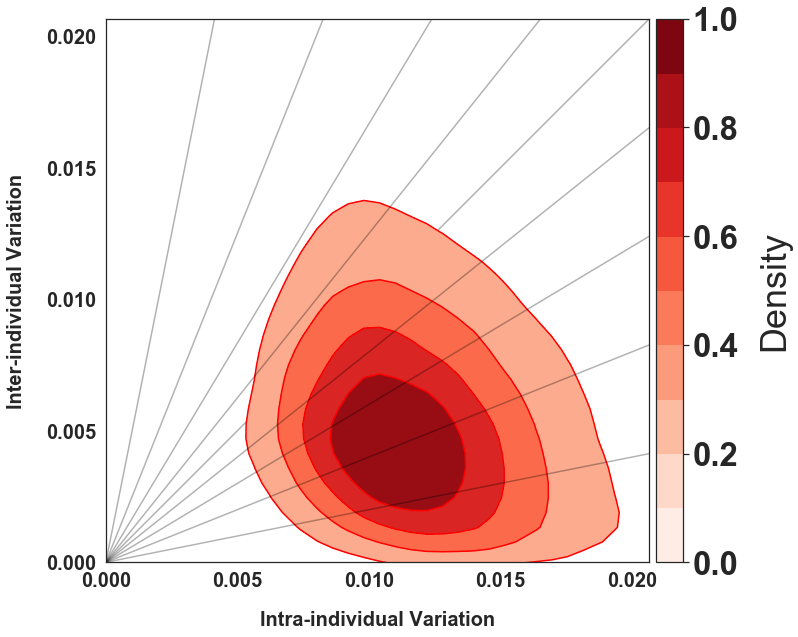

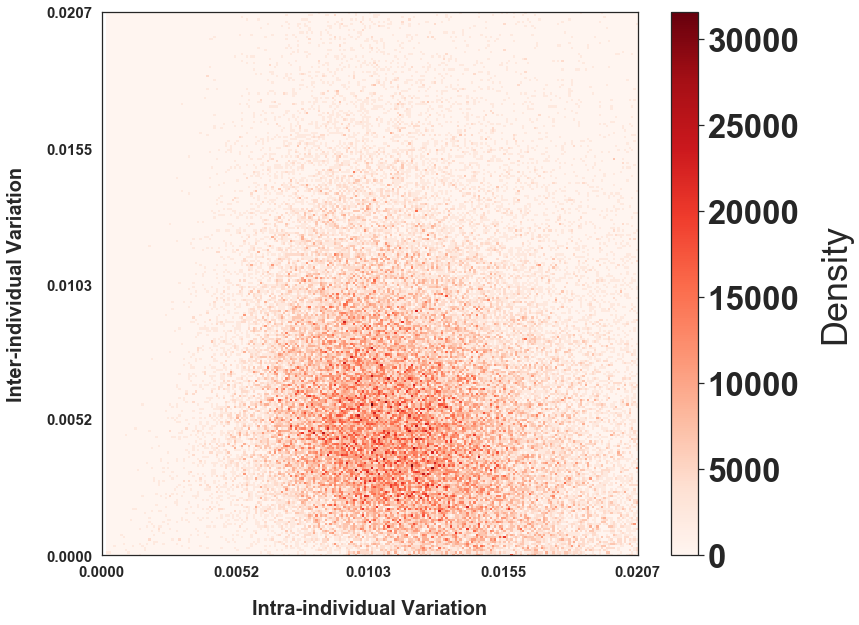

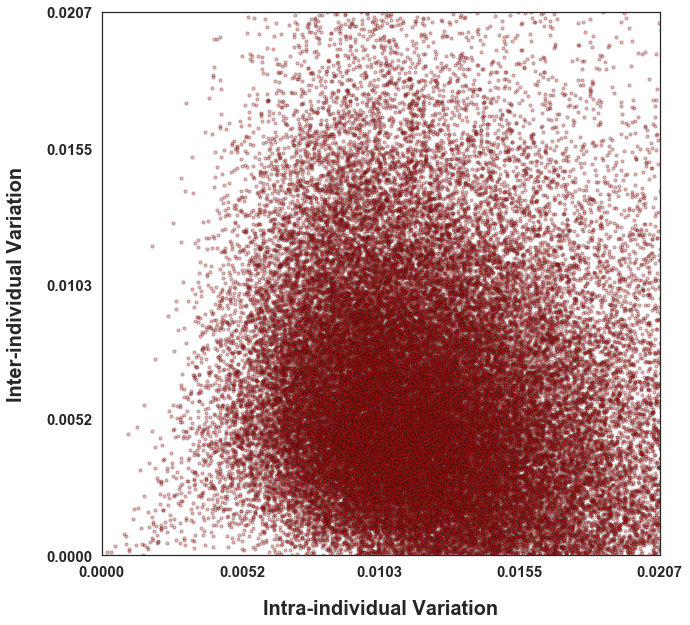

Creating kde plot
Creating nokde plot
Creating scatter plot


/Users/jaewook.cho/reliability_fieldMap_gradientFlow/reliability/reliability_field_maps.py:57: UserWarning: linewidths is ignored by contourf
  cset = contour_func(xx1, yy1, z1scale, n_levels, **kwargs)


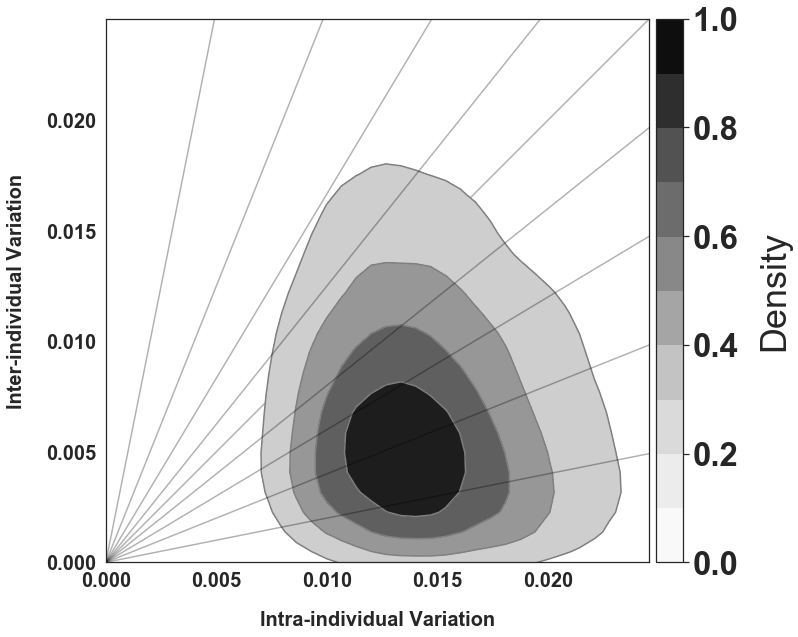

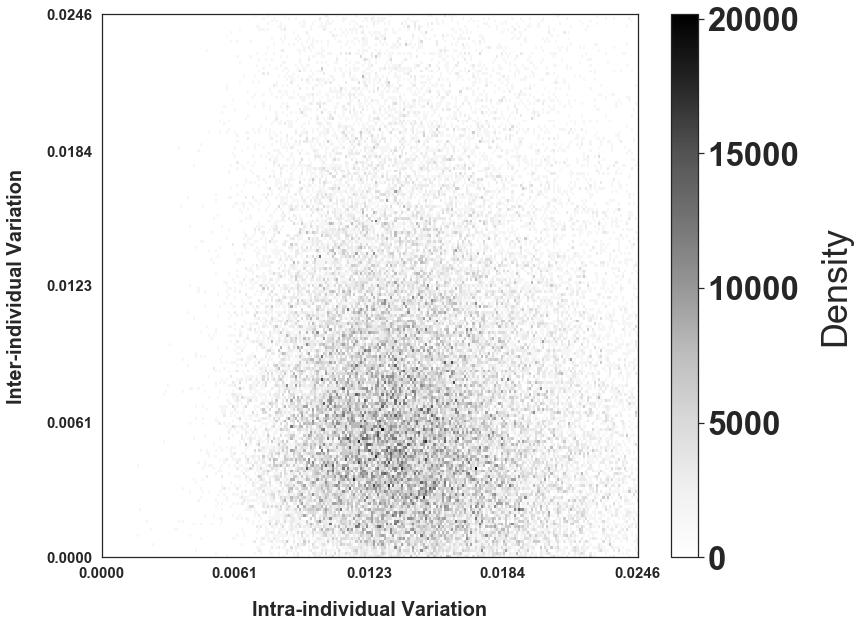

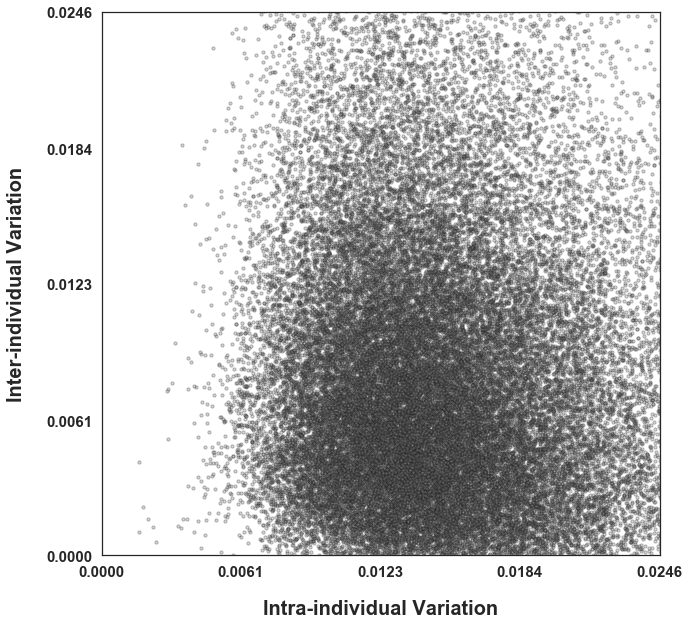

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load Data:
data = np.load('../tutorial/example_data/tutorial_data.npy',allow_pickle=True).item()
tasks = [task for task in data.keys()]

print('Task conditions in data variable: %s' % tasks)
print('Dictionary keys within each task condition: %s' % [data_keys for data_keys in data[tasks[0]].keys()])
from reliability.reliability_field_maps import plot_field_map

# Set colormaps/colors for field map contours
tasks = ['REST_nogsr',
         'REST_gsr']
taskcolors = {'REST_gsr':'grey',
              'REST_nogsr':'red'}
taskcmaps = {'REST_gsr':'Greys',
             'REST_nogsr':'Reds'}
outpath = False # Not saving any figures for now
lines = True # Show ICC lines
alpha = 1 
thr = 0.0001 # Our threshold for which variability values to include

# Plot individual field maps:
for num,task in enumerate(['REST_nogsr','REST_gsr']):
    x = data[task]['raww'][data[task]['totmask']]
    y = data[task]['rawb'][data[task]['totmask']]
    xx1,yy1,normalized = plot_field_map(x,y,taskcolors[task],taskcmaps[task],alpha,lines,outpath,thr=0.0001,gridsize=100,
                         overlay=False,cbar_option=True,figSize=(12,10),xyLim=95,shade=True,addContourLines=True,
                                       plotstyle=['kde','nokde','scatter'],bins=500)



In [42]:
tasks = list(data.keys())
newdf = {
        'x':np.r_[data[tasks[0]]['raww'][data[tasks[0]]['totmask']],data[tasks[1]]['raww'][data[tasks[1]]['totmask']]],
        'y':np.r_[data[tasks[0]]['rawb'][data[tasks[0]]['totmask']],data[tasks[1]]['rawb'][data[tasks[1]]['totmask']]],
        'task': np.r_[[tasks[0]]*len(data[tasks[0]]['rawb'][data[tasks[0]]['totmask']]),[tasks[1]]*len(data[tasks[1]]['rawb'][data[tasks[1]]['totmask']])]
        }
newdf = pd.DataFrame(newdf)

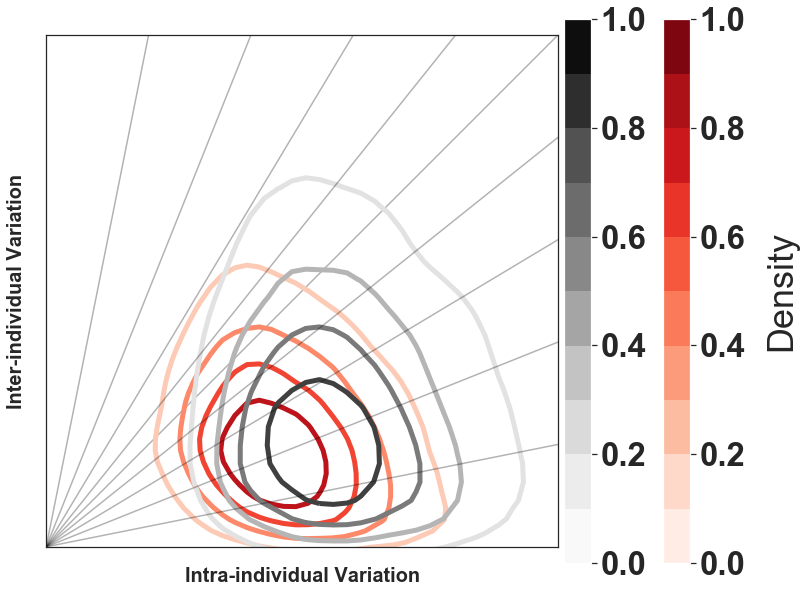

In [41]:
from reliability.reliability_field_maps import plot_field_map_overlay

# Not saving any figures for now.
outpath = False
lines = True
alpha = 1

# Choosing conditions to compare:
taskcombos = [['REST_nogsr',
               'REST_gsr']]

plot_field_map_overlay(taskcombos,data,taskcolors,taskcmaps,alpha,lines,outpath,
                      cbar_option=True,figSize=(13,10),xlim=(0,0.025),ylim=(0,0.025),
                     shade=False,thr=0.0001)

Text(0, 0.5, 'Inter-individual Variation')

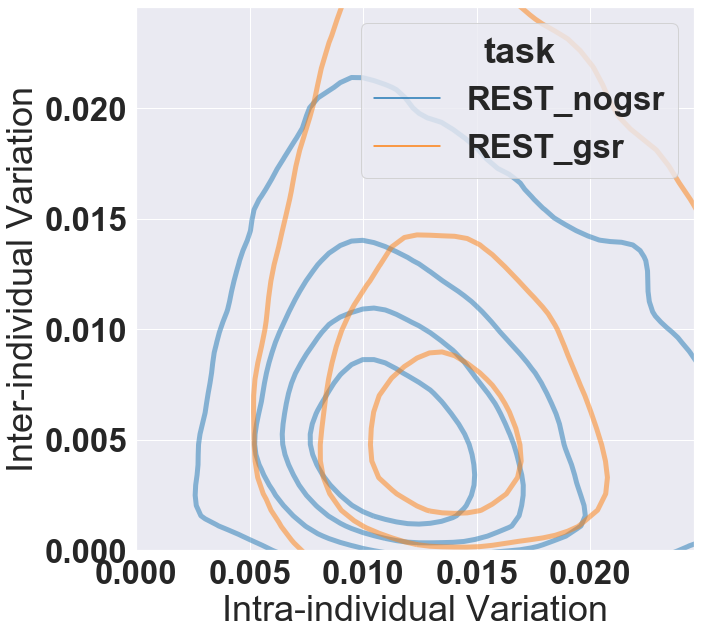

In [54]:
xyLim = 95
if int(xyLim):
    xperc = np.percentile(x,xyLim)
    yperc = np.percentile(y,xyLim)
    xy_lim = np.max([xperc,yperc])
    xyVals = (0,xy_lim)
elif type(xyLim) == 'tuple':
    xyVals = (xyLim[0],xyLim[1])
    
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.kdeplot(data=newdf,x='x',y='y',hue='task',shade=False,gridsize=100,levels=5,
            palette='tab10',common_norm=True,alpha=0.5,linewidths=5)
plt.xlim([xyVals[0],xyVals[1]])
plt.ylim([xyVals[0],xyVals[1]])
plt.xlabel('Intra-individual Variation')
plt.ylabel('Inter-individual Variation')